In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from math import sqrt
from sklearn import metrics



# Reading the data

In [2]:
airlines_df=pd.read_excel("Airlines+Data.xlsx")

In [3]:
airlines_df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airlines_df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
# Month column is already in datetime format

In [6]:
airlines_df["month"] = airlines_df.Month.dt.strftime("%b") # month extraction
airlines_df["year"] = airlines_df.Month.dt.strftime("%Y") # year extraction

In [7]:
airlines_df.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [8]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [9]:
# No Null values in the dataset

In [10]:
# Converting Month column as index column

airlines_df.set_index('Month',inplace=True)

In [11]:
airlines_df.head()

,Passengers,month,year
Month,,,
1995-01-01,112,Jan,1995
1995-02-01,118,Feb,1995
1995-03-01,132,Mar,1995
1995-04-01,129,Apr,1995
1995-05-01,121,May,1995


In [12]:
airlines_df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Visualizing the data

<AxesSubplot:xlabel='Month'>

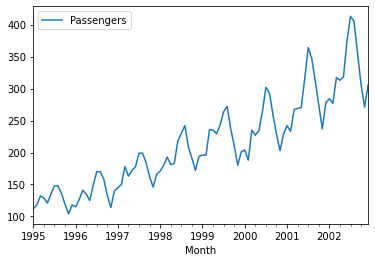

In [13]:
# Line plot 
airlines_df.plot()

Passengers plot has linear trend and multiplicative seasonility

<AxesSubplot:xlabel='month', ylabel='year'>

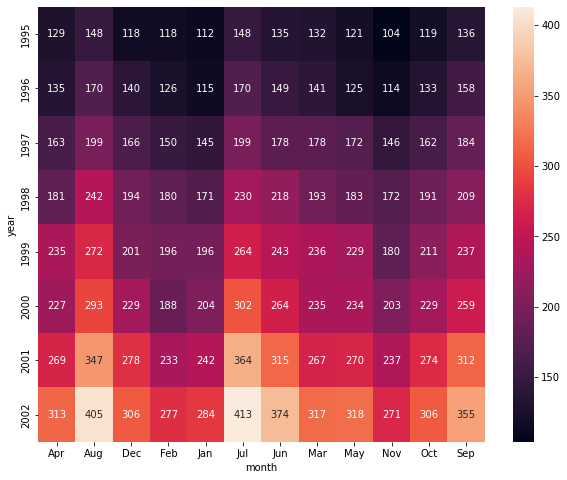

In [14]:
# Heat map

plt.figure(figsize=(10,8))
heatmap_al=pd.pivot_table(data=airlines_df,values='Passengers',index='year',columns='month',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_al,annot=True,fmt="g") #fmt is format of the grid values

# Data Preprocessing : 

In [15]:
# creating dummy variables for months to see how different months effect the output i.e., no of passengers

airlines_df=pd.get_dummies(data=airlines_df , columns=['month'])


In [16]:
airlines_df.head()

,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
Month,,,,,,,,,,,,,,
1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
# Creating the transformations:

airlines_df['t']=np.arange(1,97)  # t

airlines_df['t_squared']=airlines_df['t']*airlines_df['t']   # t^2

airlines_df['log_paseng']=np.log(airlines_df['Passengers'])   # log transform


In [18]:
airlines_df.head()

,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_squared,log_paseng
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


Train test splitting :

In [19]:
train=airlines_df.head(84)
test=airlines_df.tail(12) # consider last seasonality for training

# Model Driven Forecasting :

In [20]:
# Linear model


linear_model=smf.ols('Passengers ~ t',data=train).fit()
pred_linear=linear_model.predict(test['t'])
rmse_linear=sqrt(metrics.mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

53.19923653480264

In [21]:
# Exponential model

exp_model=smf.ols('log_paseng ~ t' , data = train).fit()
pred_exp = exp_model.predict(test['t'])
rmse_exp=sqrt(metrics.mean_squared_error(test['Passengers'] , np.exp(pred_exp)))
rmse_exp

46.05736110315608

In [22]:
# Quadratic 

quad_model=smf.ols('Passengers~t+t_squared' , data = train).fit()
pred_quad = quad_model.predict(test[['t','t_squared']])
rmse_quad=sqrt(metrics.mean_squared_error(test['Passengers'] , pred_quad))
rmse_quad

48.05188897933152

In [23]:
# Additive Seasonility

add_sea_model=smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train).fit()
pred_add_sea=add_sea_model.predict(test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])
rmse_add_sea=sqrt(metrics.mean_squared_error(test['Passengers'] , pred_add_sea))
rmse_add_sea


132.8197848142182

In [24]:
# Additive seasonality Quadratic Trend

add_sea_quad_model=smf.ols('Passengers~t+t_squared+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train).fit()
pred_add_sea_quad=add_sea_quad_model.predict(test[['t','t_squared','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])
rmse_add_sea_quad=sqrt(metrics.mean_squared_error(test['Passengers'] , pred_add_sea_quad))
rmse_add_sea_quad

26.360817612100178

In [25]:
# Multiplicative seasonality

mult_sea_model=smf.ols('log_paseng~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train).fit()
pred_mult_sea=mult_sea_model.predict(test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])
rmse_mult_sea=sqrt(metrics.mean_squared_error(test['Passengers'] , np.exp(pred_mult_sea)))
rmse_mult_sea

140.06320204708643

In [26]:
# Multiplicative seasonality with linear Trend

mult_add_sea_model=smf.ols('log_paseng~t+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train).fit()
pred_mult_add_sea=mult_add_sea_model.predict(test[['t','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])
rmse_mult_add_sea=sqrt(metrics.mean_squared_error(test['Passengers'] , np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

10.519172544323524

In [27]:
# Comparing the rmse of all models

rmse={'Models' :['linear_model','exp_model','quad_model','add_sea_model','add_sea_quad_model','mult_sea_model','mult_add_sea_model'],
       'rmse values ':[rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea]}
rmse_df=pd.DataFrame(rmse)
rmse_df

,Models,rmse values
0,linear_model,53.199237
1,exp_model,46.057361
2,quad_model,48.051889
3,add_sea_model,132.819785
4,add_sea_quad_model,26.360818
5,mult_sea_model,140.063202
6,mult_add_sea_model,10.519173


Conclusion : On comparing the rmse of each models , Multilicative seasonality with linear has got the least error.
So, that is the best model for prediction.

# Final model :

In [28]:
# Model building:

final_model=smf.ols('log_paseng~t+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=airlines_df).fit()
airlines_df['pred_passeng']=np.exp(mult_add_sea_model.predict(airlines_df[['t','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']]))


In [29]:
airlines_df.head()

,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_squared,log_paseng,pred_passeng
Month,,,,,,,,,,,,,,,,,,
1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,109.141454
1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,110.856667
1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,128.073209
1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,123.577760
1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,122.382554


<AxesSubplot:xlabel='Month'>

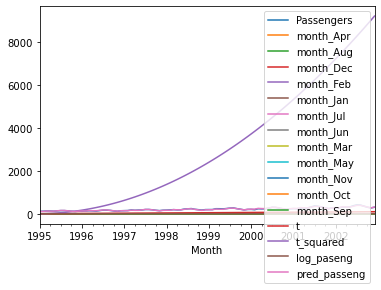

In [30]:
airlines_df.plot()